In [1]:
# pip install pandas
# pip install requests
# pip install seaborn
# pip install numpy
# pip install smopy
# pip install matplotlib
# pip install scipy

import requests
from IPython.display import GeoJSON
import pandas as pd
import io
import seaborn as sns
import numpy as np



In [2]:
sensor_params = dict(
    sensor_type='PM2.5')

r = requests.get('http://uoweb3.ncl.ac.uk/api/v1.1/sensors/csv/',sensor_params)

sensor_info = pd.read_csv(io.StringIO(r.text) )
sensor_info

Sensor Name               Location (WKT)  \
0   PER_AIRMON_MESH1967150  POINT (-1.584885 54.912025)   
1       PER_AURN_AURN_SUN2   POINT (-1.406878 54.88361)   
2   PER_AIRMON_MESH1909150  POINT (-1.603448 54.965685)   
3   PER_AIRMON_MESH1908150  POINT (-1.614942 54.971503)   
4   PER_AIRMON_MESH1763150  POINT (-1.606514 54.973793)   
..                     ...                          ...   
67  PER_AIRMON_MESH1921150   POINT (-1.60345 54.965674)   
68     PER_AIRMON_MESH1691  POINT (-1.626982 54.973636)   
69  PER_AIRMON_MESH1968150   POINT (-1.614848 54.97149)   
70  PER_AIRMON_MESH1922150  POINT (-1.609327 54.991308)   
71  PER_AIRMON_MESH1962150  POINT (-1.211382 54.580264)   

    Ground Height Above Sea Level  Sensor Height Above Ground  Broker Name  \
0                       81.610001                         2.0  aq_mesh_api   
1                       63.330002                         2.0  AURN Sensor   
2                       31.170000                         2.0  aq_mesh_api   
3                       42.200001                         2.0  aq_mesh_api   
4                       35.040001                         2.0  aq_mesh_api   
..                            ...                         ...          ...   
67                      31.170000                         2.0  aq_mesh_api   
68                      72.419998                         2.0  aq_mesh_api   
69                      42.040001                         2.0  aq_mesh_api   
70                      56.869999                         2.0  aq_mesh_api   
71                      -1.390000                         2.0  aq_mesh_api   

    Third Party  Sensor Centroid Longitude  Sensor Centroid Latitude  Raw ID  
0         False                  -1.584885                 54.912025   79203  
1          True                  -1.406878                 54.883610   70413  
2         False                  -1.603448                 54.965685   79152  
3         False                  -1.614942                 54.971503   79151  
4         False                  -1.606514                 54.973793   73092  
..          ...                        ...                       ...     ...  
67        False                  -1.603450                 54.965674   79164  
68        False                  -1.626982                 54.973636    1724  
69        False                  -1.614848                 54.971490   79204  
70        False                  -1.609327                 54.991308   79165  
71        False                  -1.211382                 54.580264   79198  

[72 rows x 9 columns]

Lowered zoom level to keep map size reasonable. (z = 10)


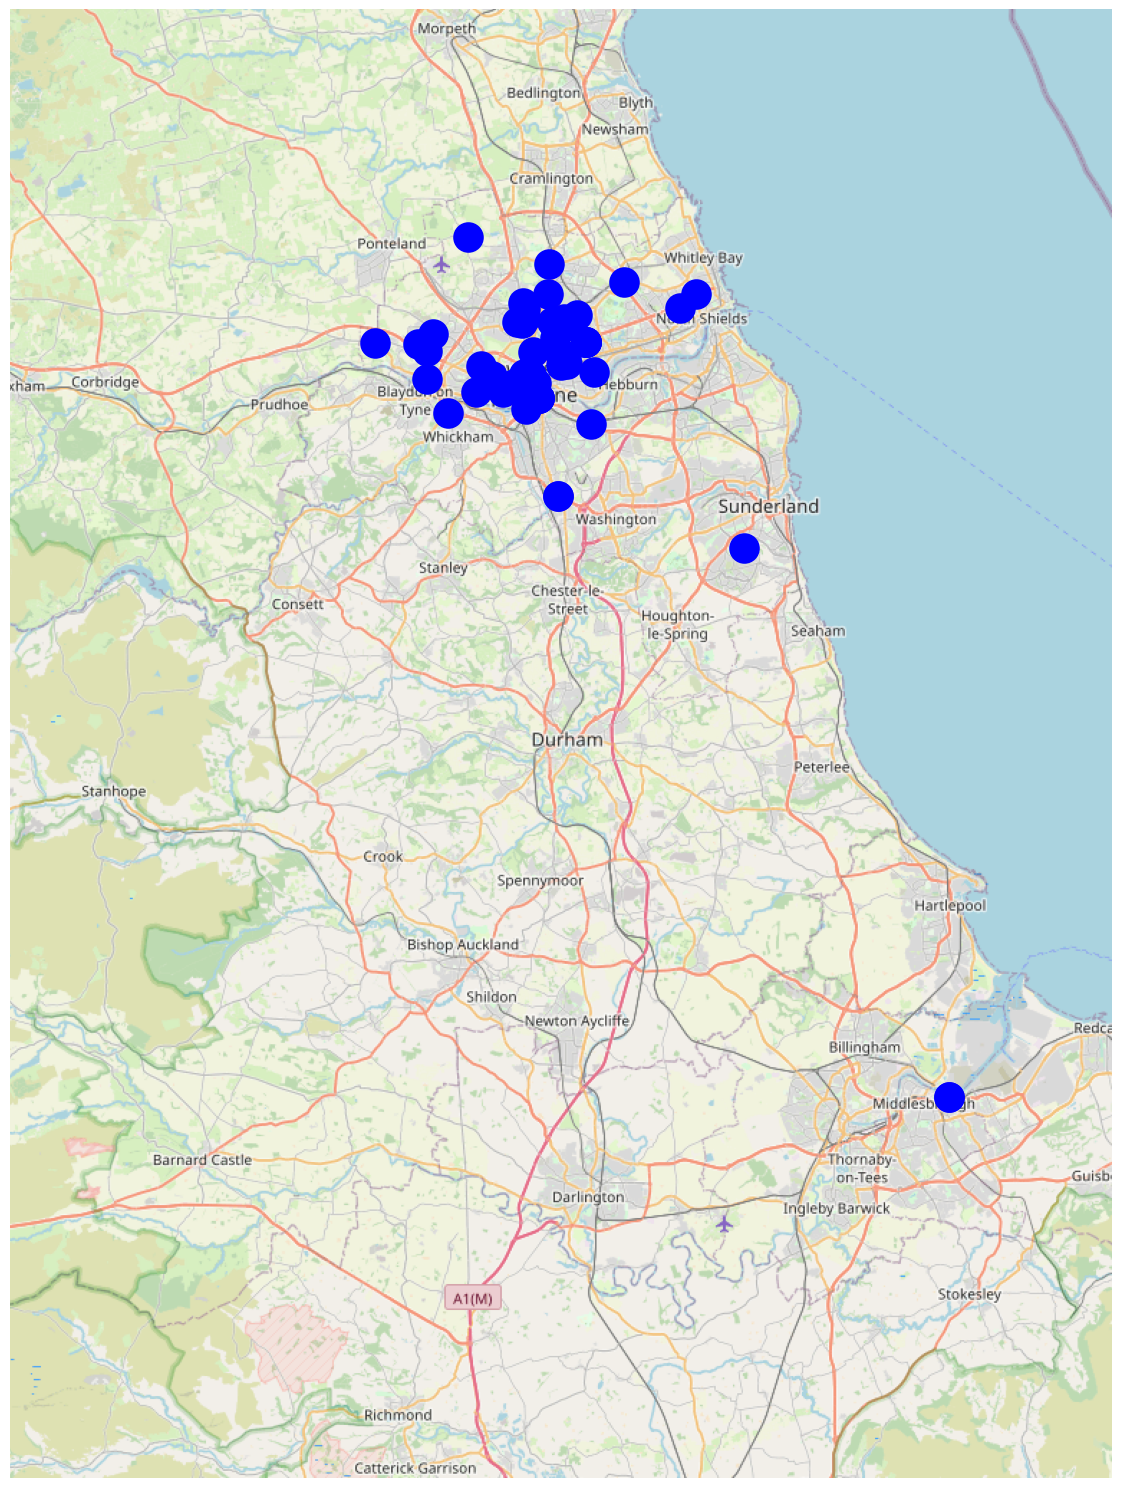

In [3]:
import smopy
import matplotlib.patheffects as pe

bbox = (
min(sensor_info['Sensor Centroid Latitude']),
    min(sensor_info['Sensor Centroid Longitude']),
    max(sensor_info['Sensor Centroid Latitude']),
    max(sensor_info['Sensor Centroid Longitude']),
)

map = smopy.Map(bbox, z=17)
ax = map.show_mpl(figsize=(15, 15))
for i,row in sensor_info.iterrows():
    x, y = map.to_pixels(row['Sensor Centroid Latitude'], row['Sensor Centroid Longitude'])
    ax.plot(x, y, 'ob', ms=20, mew=2);

In [13]:
from datetime import datetime, timedelta

api_date_string_format = "%Y%m%d%H%M%S"

current_time = datetime.now()

start_time = current_time - timedelta(days=1)

start_time = datetime(start_time.year, start_time.month, start_time.day, start_time.hour)
end_time = datetime(current_time.year, current_time.month, current_time.day, current_time.hour)



data_params = dict(
    data_variable='PM2.5',
    agg_method='median',
    agg_period='15mins',
    starttime=start_time.strftime(api_date_string_format),
    endtime=end_time.strftime(api_date_string_format) 
)

data_params.update(sensor_params)
data_params

{'data_variable': 'PM2.5',
 'agg_method': 'median',
 'agg_period': '15mins',
 'starttime': '20230309180000',
 'endtime': '20230310180000',
 'sensor_type': 'PM2.5'}

In [14]:
r = requests.get('http://uoweb3.ncl.ac.uk/api/v1.1/sensors/data/agg/csv/', data_params)
print(r.request.url)
df = pd.read_csv(io.StringIO(r.text))
print(df.head(10))
output = io.StringIO(r.text)
output.readlines()
df.head()
print("The shape of the dataframe is: ", df.shape)

df.describe()

https://newcastle.urbanobservatory.ac.uk/api/v1.1/sensors/data/agg/csv/?data_variable=PM2.5&agg_method=median&agg_period=15mins&starttime=20230309180000&endtime=20230310180000&sensor_type=PM2.5
              Sensor Name Variable   Units            Timestamp   Value  \
0  PER_AIRMON_MESH1903150    PM2.5  ugm -3  2023-03-09 18:00:00  0.0000   
1  PER_AIRMON_MESH1910150    PM2.5  ugm -3  2023-03-09 18:00:00  2.6430   
2  PER_AIRMON_MESH1968150    PM2.5  ugm -3  2023-03-09 18:00:00  3.4035   
3  PER_AIRMON_MESH1916150    PM2.5  ugm -3  2023-03-09 18:00:00  1.2640   
4  PER_AIRMON_MESH1911150    PM2.5  ugm -3  2023-03-09 18:00:00  3.3795   
5  PER_AIRMON_MESH1919150    PM2.5  ugm -3  2023-03-09 18:00:00  0.0000   
6  PER_AIRMON_MESH1977150    PM2.5  ugm -3  2023-03-09 18:00:00  8.5250   
7  PER_AIRMON_MESH1904150    PM2.5  ugm -3  2023-03-09 18:00:00  3.0590   
8  PER_AIRMON_MESH1913150    PM2.5  ugm -3  2023-03-09 18:00:00  0.1500   
9  PER_AIRMON_MESH1973150    PM2.5  ugm -3  2023-03-09 1

Value  Number of records  Ground Height Above Sea Level  \
count  3823.000000        4155.000000                    4155.000000   
mean      8.100051           6.949458                      56.096855   
std      38.218619           6.762413                      25.059554   
min      -3.510000           0.000000                       3.810000   
25%       0.430000           1.000000                      39.040001   
50%       1.668000           3.000000                      47.779999   
75%       3.239000          15.000000                      66.190002   
max     453.276000          15.000000                     115.570000   

       Sensor Height Above Ground  Sensor Centroid Longitude  \
count                      4155.0                4155.000000   
mean                          2.0                  -1.603459   
std                           0.0                   0.052040   
min                           2.0                  -1.718833   
25%                           2.0                  -1.618791   
50%                           2.0                  -1.606514   
75%                           2.0                  -1.577888   
max                           2.0                  -1.453330   

       Sensor Centroid Latitude        Raw ID  
count               4155.000000   4155.000000  
mean                  54.989115  77079.112154  
std                    0.024599  10294.139636  
min                   54.912211   1726.000000  
25%                   54.972275  79156.000000  
50%                   54.988910  79197.000000  
75%                   55.007407  79213.000000  
max                   55.053906  79565.000000

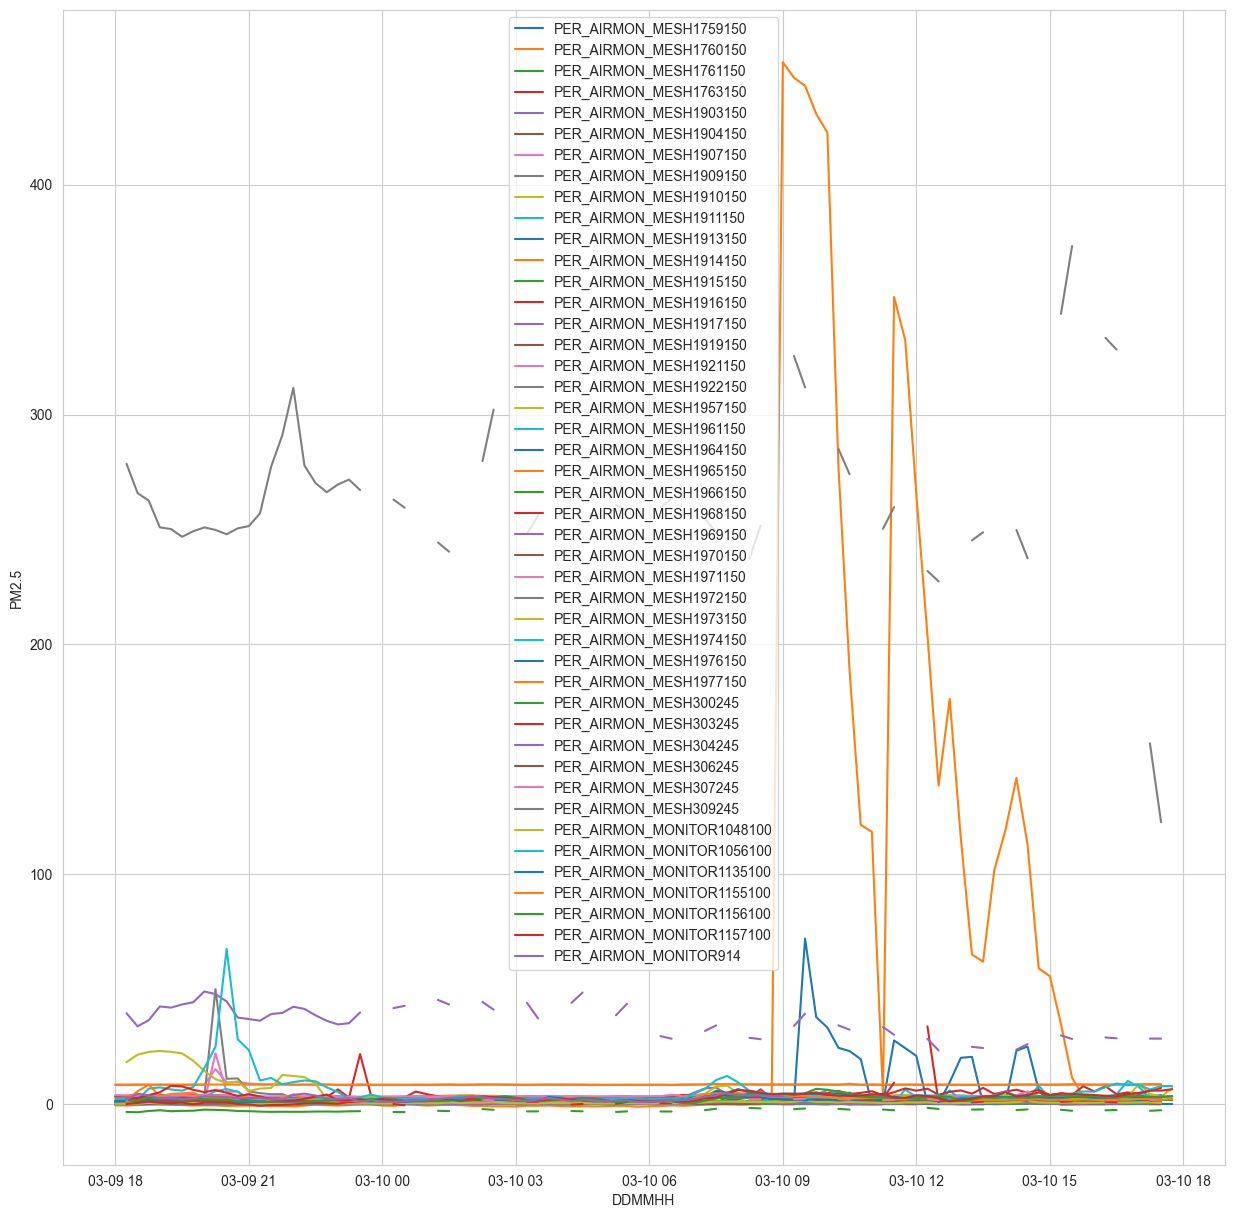

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats


fig, ax = plt.subplots(figsize=(15,15))

for sensor_name,sensor_data in  df.groupby('Sensor Name'):
    datetimes = pd.to_datetime(sensor_data['Timestamp'])
    plt.plot(datetimes,sensor_data['Value'],label=sensor_name)
    plt.xlabel("DDMMHH")
    plt.ylabel(data_params["data_variable"])
    
    
plt.legend()


(4155, 16)
(3586, 16)


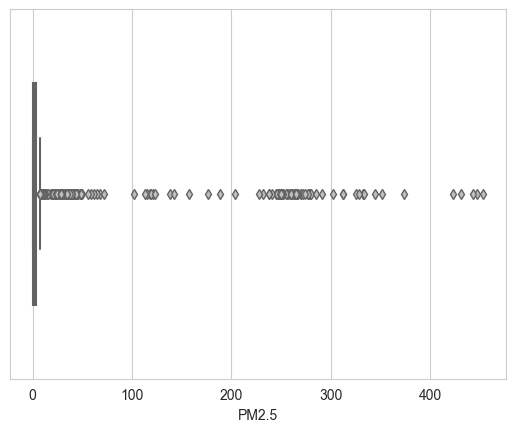

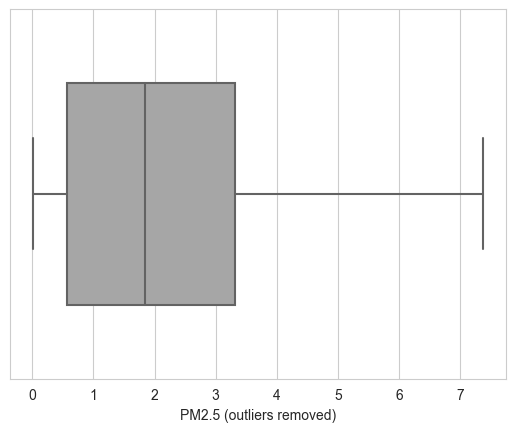

AttributeError: 'FacetGrid' object has no attribute 'get_lines'

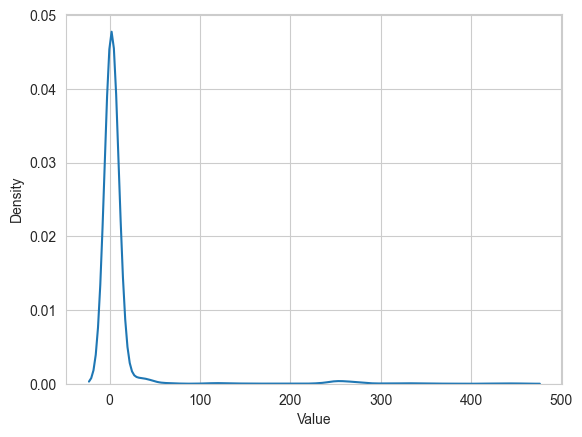

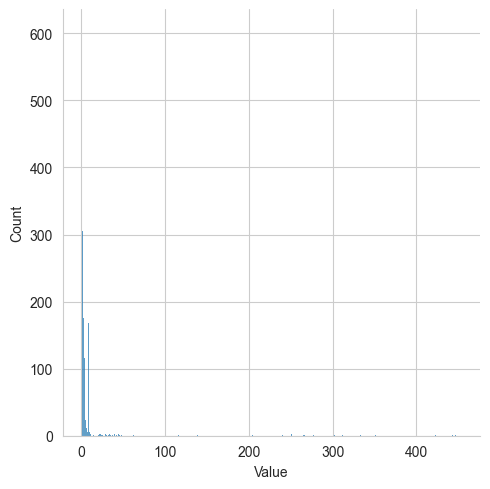

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline

# Remove any negative readings and check shape
print(df.shape)
dfNz=df[df['Value']>0]

print(dfNz.shape)

sns.set_style("whitegrid")
ax.set_xlim(-1.5,2.5)
ax.set_aspect=(1.5) 

flierprops = dict(markerfacecolor='0.75', markersize=5, linestyle='none')


sns.boxplot(x=dfNz['Value'], width=0.6, color=".65", flierprops=flierprops)
plt.xlabel(data_params["data_variable"])
plt.show()

sns.boxplot(x=dfNz['Value'], width=0.6, color=".65", showfliers=False)
plt.xlabel(data_params["data_variable"]+" (outliers removed)")
plt.show()


# kde plot
x,y = sns.kdeplot(dfNz['Value']).get_lines()[0].get_data()
# distplot
x,y = sns.displot(dfNz['Value']).get_lines()[0].get_data()


(3586, 16)
(3187, 16)


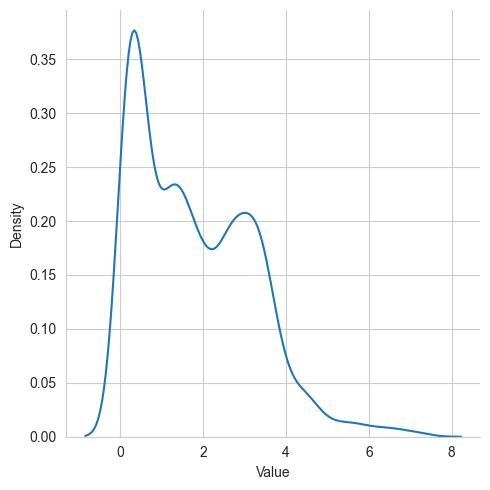

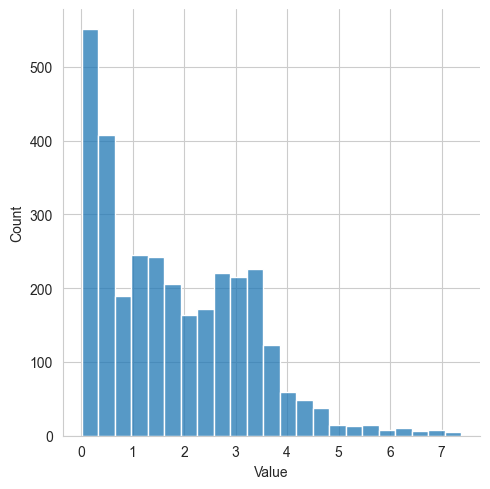

In [53]:

def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

nonOutliers = Remove_Outlier_Indices(dfNz.Value)

# Non-Outlier Subset of the Given Dataset
dfIQR= dfNz[nonOutliers]
print(dfNz.shape)
print(dfIQR.shape)


# kde plot

sns.displot(data=dfIQR, x=dfIQR['Value'], kind="kde")
sns.displot(data=dfIQR, x=dfIQR['Value'])
plt.show()



NameError: name 'data' is not defined

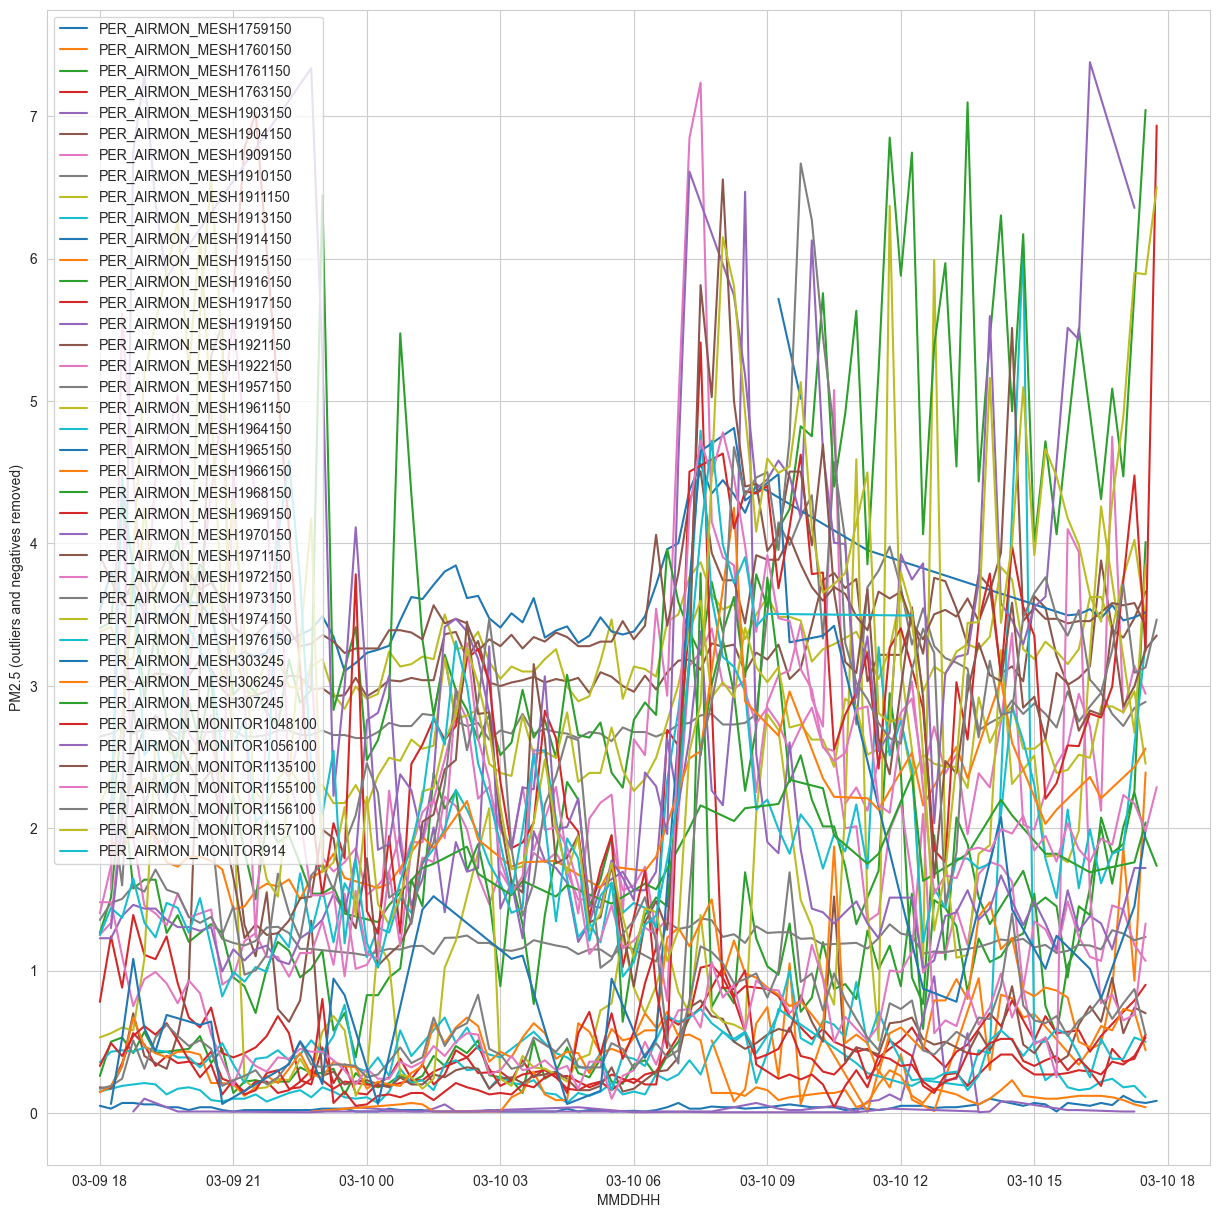

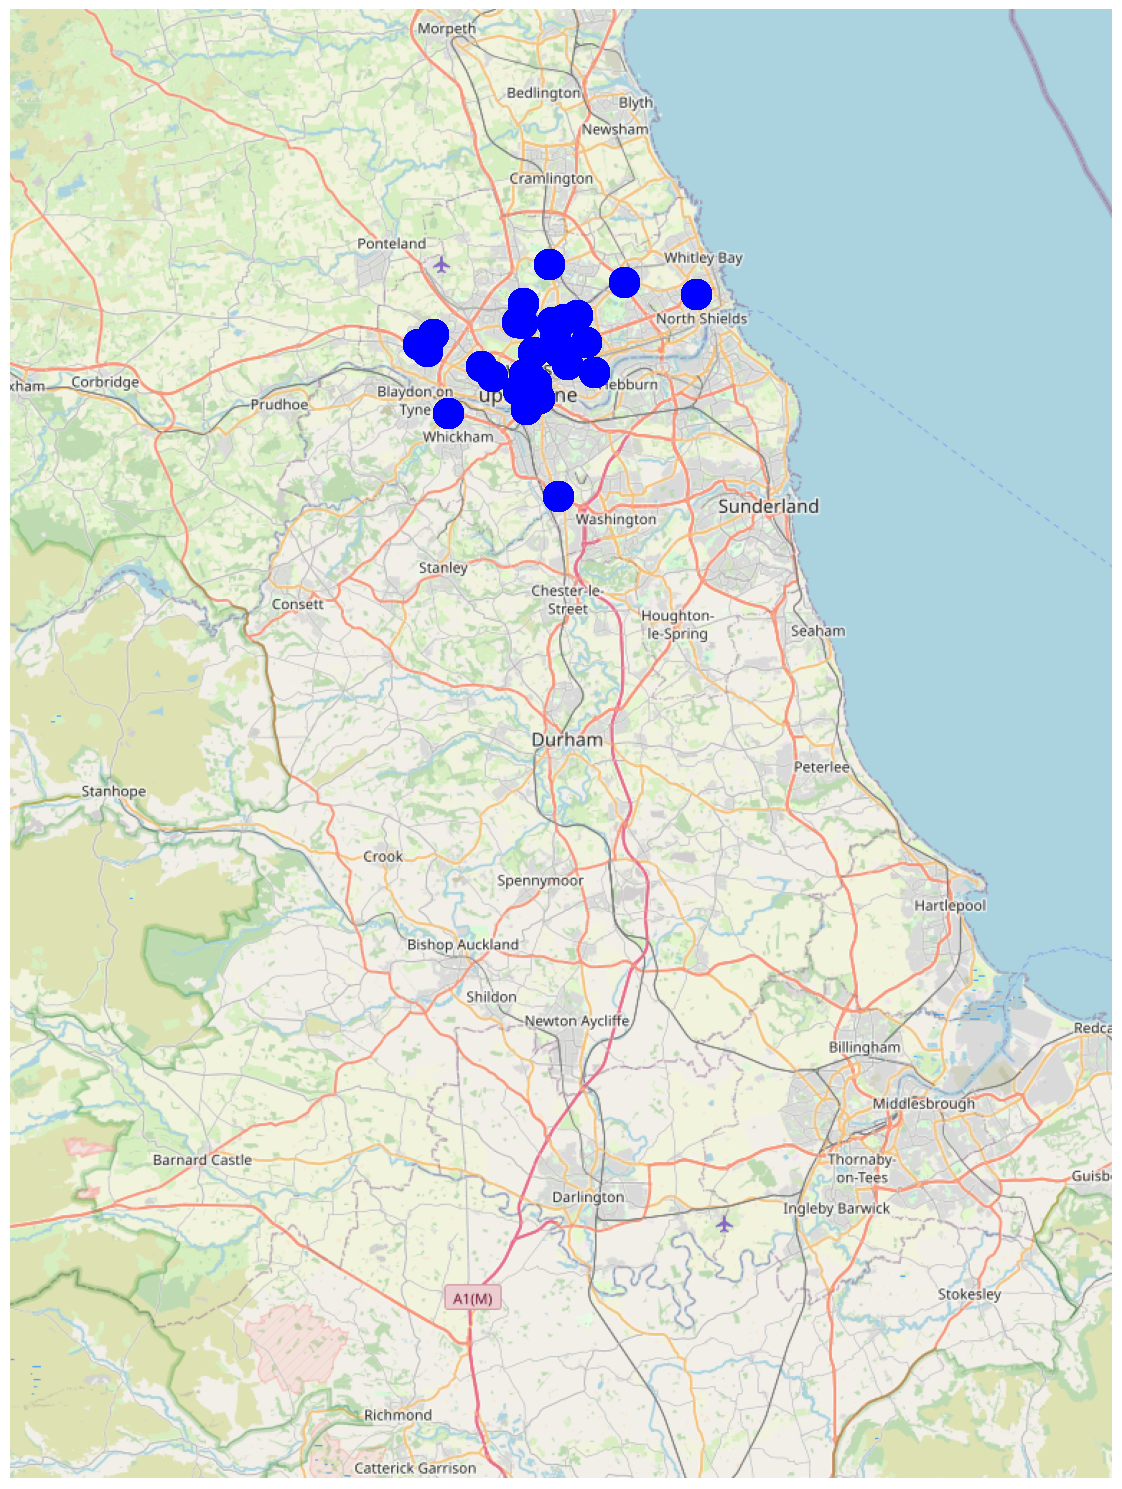

In [20]:


fig, ax = plt.subplots(figsize=(15,15))

for sensor_name,sensor_data in  dfIQR.groupby('Sensor Name'):
    datetimes = pd.to_datetime(sensor_data['Timestamp'])
    plt.plot(datetimes,sensor_data['Value'],label=sensor_name)
    plt.xlabel("MMDDHH")
    plt.ylabel(data_params["data_variable"] + " (outliers and negatives removed)")
    
    
plt.legend()


bbox = (
min(sensor_info['Sensor Centroid Latitude']),
    min(sensor_info['Sensor Centroid Longitude']),
    max(sensor_info['Sensor Centroid Latitude']),
    max(sensor_info['Sensor Centroid Longitude']),
)

map = smopy.Map(bbox, z=10)
ax = map.show_mpl(figsize=(15, 15))
for i,row in dfIQR.iterrows():
    x, y = map.to_pixels(row['Sensor Centroid Latitude'], row['Sensor Centroid Longitude'])
    ax.plot(x, y, 'ob', ms=20, mew=2);
    


#print(z)
# Sensor - Colour
# X axis - Time
# Y axis - value PM2.5


In [10]:
%%javascript
require.config({
    paths: {
        d3: 'https://d3js.org/d3.v5.min'
    }
});

<IPython.core.display.Javascript object>

In [11]:
%%javascript
(function(element) {
    require(['d3'], function(d3) {   
        var data = [1, 2, 4, 8, 16, 8, 4, 2, 1]

        var svg = d3.select(element.get(0)).append('svg')
            .attr('width', 400)
            .attr('height', 200);
        svg.selectAll('circle')
            .data(data)
            .enter()
            .append('circle')
            .attr("cx", function(d, i) {return 40 * (i + 1);})
            .attr("cy", function(d, i) {return 100 + 30 * (i % 3 - 1);})
            .style("fill", "#1570a4")
            .transition().duration(2000)
            .attr("r", function(d) {return 2*d;})
        ;
    })
})(element);

<IPython.core.display.Javascript object>

In [12]:
%%javascript
(function(element) {
  require(['d3'], function(d3) {
    
    
    
    chart = SpikeMap(population, {
      value: ([population]) => +population,
      position([, stateid, countyid]) {
        const county = countymap.get(stateid + countyid);
        return county && centroid(county);
      },
      title([population, stateid, countyid]) {
        const state = statemap.get(stateid);
        const county = countymap.get(stateid + countyid);
        return `${county?.properties.name}, ${state?.properties.name}\n${(+population).toLocaleString("en")}`;
      },
      features: nation,
      borders: statemesh,
      width: 975,
      height: 610
        
    })
  }(element))
});

<IPython.core.display.Javascript object>